In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import poissonImg,poisson

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
source_img = cv2.imread('source.jpg', cv2.IMREAD_COLOR)
target_img = cv2.imread('target.jpg', cv2.IMREAD_COLOR)
mask_img = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)
mask = np.atleast_3d(mask_img).astype(np.float) / 255.
mask[mask != 1] = 0
mask = mask[:,:,0]
channels = source_img.shape[-1]
result_stack = [poisson.process(source_img[:,:,i], target_img[:,:,i], mask) for i in range(channels)]
result = cv2.merge(result_stack)
cv2.imwrite('./result2.jpg', result)

True

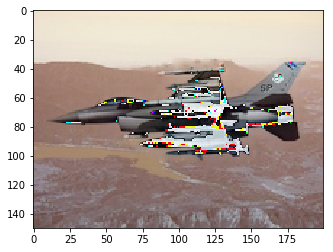

In [135]:
plt.figure()
plt.imshow(result.astype(np.uint8))

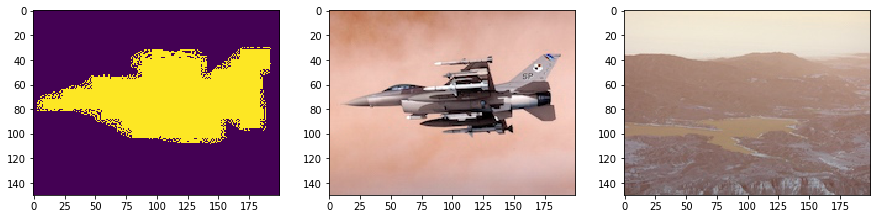

In [139]:
# read images
img_src = cv2.imread('source.jpg', cv2.IMREAD_COLOR)
img_dst = cv2.imread('target.jpg', cv2.IMREAD_COLOR)
img_mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)

# normalize mask
img_mask = img_mask/255
img_mask[img_mask < 1] = 0

# bgr to rgb, float [0,1]
#img_src = img_src[:,:,::-1].astype(np.float)/255
#img_dst = img_dst[:,:,::-1].astype(np.float)/255

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_mask)
plt.subplot(1,3,2)
plt.imshow(img_src)
plt.subplot(1,3,3)
plt.imshow(img_dst)

In [133]:
channels = img_src.shape[-1]
# Call the poisson method on each individual channel
img_clone = [poissonImg.poisson_clone(img_src[:,:,i],img_dst[:,:,i],img_mask) for i in range(channels)]
# Merge the channels back into one image
img_clone = cv2.merge(img_clone)
#cv2.imwrite('./result.jpg',(img_clone[:,:,::-1]*255).astype(np.uint8))
cv2.imwrite('./result.jpg',img_clone)

True

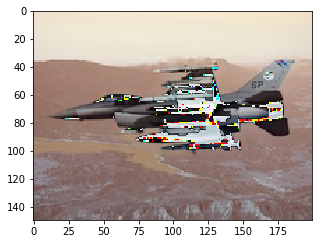

In [138]:
plt.figure(figsize=(5,5))
plt.imshow(img_clone.astype(np.uint8))